# EDA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_supahcoolsoft = pd.read_csv('supahcoolsoft.csv')


df_supahcoolsoft.head()


,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24


# Shape of the data 

In [2]:
df_supahcoolsoft.shape
# shows 100 rows and 9 columns

(100, 9)

In [3]:
df_supahcoolsoft.info()
# shows the data types from each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   100 non-null    object 
 1   FirstName    100 non-null    object 
 2   LastName     100 non-null    object 
 3   Age          100 non-null    int64  
 4   Department   98 non-null     object 
 5   Position     99 non-null     object 
 6   Salary_SEK   99 non-null     float64
 7   Email        100 non-null    object 
 8   PhoneNumber  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [4]:
df_supahcoolsoft.describe(percentiles=(.1 ,.9))

,Age,Salary_SEK
count,100.000000,99.000000
mean,43.430000,52049.181818
std,10.032528,10993.553359
min,25.000000,30452.000000
10%,29.000000,36541.600000
50%,42.500000,52919.000000
90%,57.000000,67029.400000
max,60.000000,69742.000000


In [5]:
df_salaries = df_supahcoolsoft['Salary_SEK']
print(df_salaries.median())


52919.0


In [6]:
df_positions = df_supahcoolsoft['Position'].unique()

median_salaries = df_supahcoolsoft.groupby('Position')['Salary_SEK'].median()

median_salaries



Position
AI Specialist                62760.5
BI Developer                 48608.5
Big Data Engineer            57958.0
Data Architect               60572.0
Data Scientist               51919.0
Database Administrator       48482.0
ETL Developer                44192.0
Junior Data Analyst          34877.5
Junior Data Engineer         41905.0
Junior Data Scientist        43595.5
Machine Learning Engineer    51806.0
Senior Data Analyst          57114.5
Senior Data Engineer         65740.0
Senior Data Scientist        65526.0
Name: Salary_SEK, dtype: float64

In [7]:
df_new = df_supahcoolsoft[['Position','Salary_SEK']]
df_new

,Position,Salary_SEK
0,AI Specialist,60777.0
1,Database Administrator,46020.0
2,Data Scientist,48503.0
3,Junior Data Scientist,47296.0
4,Junior Data Scientist,42435.0
...,...,...
95,Junior Data Engineer,42590.0
96,BI Developer,42809.0
97,Senior Data Engineer,62630.0
98,Senior Data Analyst,52075.0


In [8]:
df_new.shape

(100, 2)

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Position    99 non-null     object 
 1   Salary_SEK  99 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
df_new["Salary_SEK"] = pd.to_numeric(df_new["Salary_SEK"] , errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8772\1686732509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Salary_SEK"] = pd.to_numeric(df_new["Salary_SEK"] , errors='coerce')


In [11]:
df_new.isnull().sum()

Position      1
Salary_SEK    1
dtype: int64

In [12]:
df_new = df_new.dropna(subset=['Salary_SEK'])

In [13]:
df_new = df_new.dropna(subset=['Position'])

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Position    98 non-null     object 
 1   Salary_SEK  98 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


<Axes: xlabel='Position'>

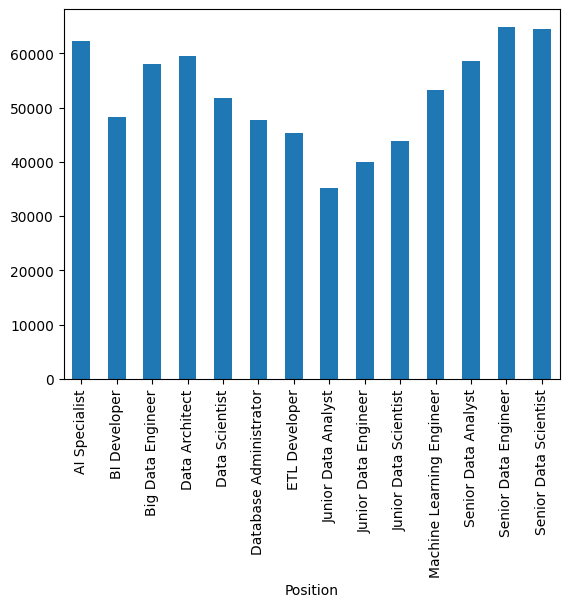

In [15]:
df_new.groupby('Position')['Salary_SEK'].mean().plot(kind= 'bar')

# Olympic Games in Paris Dataset 

In [16]:
df_olympics = pd.read_html('https://en.wikipedia.org/wiki/2024_Summer_Olympics')
df_olympics 


[                                                    0  \
 0                  Emblem of the 2024 Summer Olympics   
 1                                            Location   
 2                                               Motto   
 3                                             Nations   
 4                                            Athletes   
 5                                              Events   
 6                                             Opening   
 7                                             Closing   
 8                                           Opened by   
 9                                           Closed by   
 10                                           Cauldron   
 11                                              Venue   
 12  Summer← Tokyo 2020Los Angeles 2028 → Winter← B...   
 
                                                     1  
 0                  Emblem of the 2024 Summer Olympics  
 1                                       Paris, France  
 2   Games Wide

In [17]:
df_votes = df_olympics[2]
df_votes

,City,Nation,Votes
0,Paris,France,Selected as 2024 host
1,Los Angeles,United States,Selected as 2028 host
2,Hamburg,Germany,Withdrew
3,Rome,Italy,Withdrew
4,Budapest,Hungary,Withdrew


In [18]:
df_events = df_olympics[3]
for i in range(4 , 8) :
    df_events = pd.concat([df_events, df_olympics[i] ], axis=0)
df_events
    
    

,Venue,Events,Capacity,Status,Ref.
0,Yves du Manoir Stadium,Field hockey,15000,Renovated,[29]
1,Stade de France,Rugby sevens,77083,Existing,[30]
2,Stade de France,Athletics (track and field),77083,Existing,[30]
3,Stade de France,Closing ceremony,77083,Existing,[30]
4,Paris La Défense Arena,"Aquatics (swimming, water polo finals)",15220,Existing,[31]
...,...,...,...,...,...
5,"Parc de l'Aire des Vents, Dugny",Media Village,—,Temporary,NaN
6,Le Bourget Exhibition Centre and Media Village...,International Broadcast Centre,15000,Existing,NaN
7,Paris Congress Centre,Main Press Centre,—,Existing,NaN
8,Polygone de Vincennes [fr],Road cycling training venue,—,Existing,NaN


In [19]:
df_events.isnull().sum()

Venue        0
Events       0
Capacity     0
Status       0
Ref.        56
dtype: int64

In [20]:
len(df_events)


67

In [21]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Venue     67 non-null     object
 1   Events    67 non-null     object
 2   Capacity  67 non-null     object
 3   Status    67 non-null     object
 4   Ref.      11 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


<Axes: xlabel='NOC'>

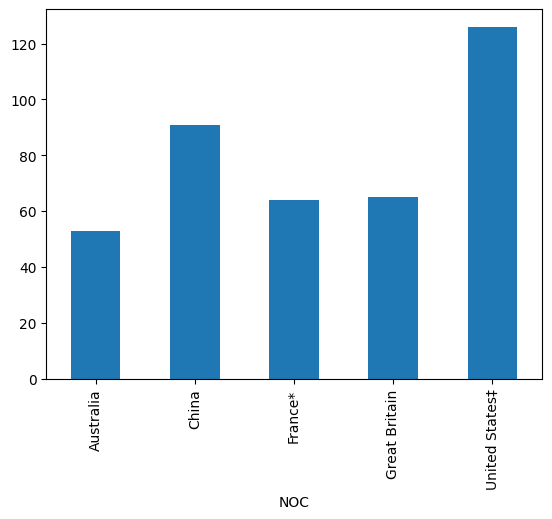

In [22]:



df_countries = df_olympics[12].sort_values(by= 'Total' , ascending= False)

df_countries[2:7].groupby('NOC')['Total'].mean().plot(kind= 'bar')


<Axes: xlabel='NOC'>

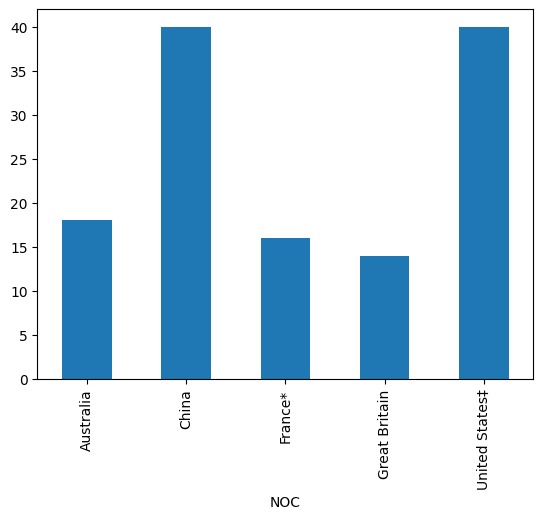

In [23]:
df_countries[2:7].groupby('NOC')['Gold'].mean().plot(kind= 'bar')

In [24]:
df_venues = df_events['Venue']
df_venues=df_venues.drop_duplicates()
len(df_venues)

43

In [25]:
df_events

,Venue,Events,Capacity,Status,Ref.
0,Yves du Manoir Stadium,Field hockey,15000,Renovated,[29]
1,Stade de France,Rugby sevens,77083,Existing,[30]
2,Stade de France,Athletics (track and field),77083,Existing,[30]
3,Stade de France,Closing ceremony,77083,Existing,[30]
4,Paris La Défense Arena,"Aquatics (swimming, water polo finals)",15220,Existing,[31]
...,...,...,...,...,...
5,"Parc de l'Aire des Vents, Dugny",Media Village,—,Temporary,NaN
6,Le Bourget Exhibition Centre and Media Village...,International Broadcast Centre,15000,Existing,NaN
7,Paris Congress Centre,Main Press Centre,—,Existing,NaN
8,Polygone de Vincennes [fr],Road cycling training venue,—,Existing,NaN


In [26]:
df_new = df_events.groupby('Venue').agg({'Status': 'first' , 'Capacity' : 'first'}).reset_index()

df_new[df_new['Status'] == 'Built for the Games']

,Venue,Status,Capacity
16,Olympic Village,Built for the Games,"18,000 athletes"
20,Paris Aquatic Centre,Built for the Games,5000
28,Porte de La Chapelle Arena,Built for the Games,8000


# Cleaning the dataframe

In [27]:

df_events['Capacity'] = (
df_events['Capacity'].str.replace(',' , '' , regex= False)
.str.replace('athletes' , '', regex= False)
.str.replace('(15,000 + 12,000 + 9,000)' , '', regex= False)
.str.replace('(overall)' , '', regex= False)
.str.replace('(3,000 sitting)' , '', regex= False)
.str.replace('(22,000 + 58,000)' , '', regex= False)
.str.replace(' / 13,000' , '', regex= False)

.str.replace('—' , ''))
df_events

,Venue,Events,Capacity,Status,Ref.
0,Yves du Manoir Stadium,Field hockey,NaN,Renovated,[29]
1,Stade de France,Rugby sevens,NaN,Existing,[30]
2,Stade de France,Athletics (track and field),NaN,Existing,[30]
3,Stade de France,Closing ceremony,NaN,Existing,[30]
4,Paris La Défense Arena,"Aquatics (swimming, water polo finals)",NaN,Existing,[31]
...,...,...,...,...,...
5,"Parc de l'Aire des Vents, Dugny",Media Village,,Temporary,NaN
6,Le Bourget Exhibition Centre and Media Village...,International Broadcast Centre,15000,Existing,NaN
7,Paris Congress Centre,Main Press Centre,,Existing,NaN
8,Polygone de Vincennes [fr],Road cycling training venue,,Existing,NaN


In [28]:
df_new = df_events.groupby('Venue').agg({'Status': 'first' , 'Capacity' : 'first'}).reset_index()

df_new[df_new['Status'] == 'Existing']

,Venue,Status,Capacity
0,"Allianz Riviera, Nice",Existing,None
1,"Aranui 5, Tahiti",Existing,256
2,Arena Paris Nord,Existing,None
3,Bercy Arena,Existing,15000
6,Grand Palais,Existing,8000
11,Le Bourget Exhibition Centre and Media Village...,Existing,15000
12,Le Golf National,Existing,35000
14,National Olympic Nautical Stadium of Île-de-Fr...,Existing,None
15,"National Shooting Centre, Châteauroux",Existing,None
17,"Parc Olympique Lyonnais, Lyon",Existing,None


In [35]:
import requests
import json 


url = 'https://dataportal.livsmedelsverket.se/livsmedel/api/v1/livsmedel/1007/naringsvarden?sprak=2'

# getting the url 
response = requests.get(url, headers={'accept': 'text/plain'})


if response.status_code == 200 :
    data = response.json()
    print(json.dumps(data  , indent= 4))
    for nutrient in data :
        nutrient_name = nutrient.get('namn')  # Nutrient name in Swedish
        value = nutrient.get('varde')  # Nutrient value
        unit = nutrient.get('enhet') 
        if value != 0:
            print(f"{nutrient_name}: {value} {unit}")

else:
    print(f"Failed to retrieve data: {response.status_code}")

    



[
    {
        "namn": "Zinc, Zn",
        "euroFIRkod": "ZN",
        "forkortning": "ZN",
        "varde": 1.8,
        "enhet": "mg",
        "viktGram": 100
    },
    {
        "namn": "Wholegrain total",
        "euroFIRkod": "WHOLET",
        "forkortning": "WHOLET",
        "varde": 0,
        "enhet": "g",
        "viktGram": 100,
        "berakning": "0,0+0,0+0,0+0,0+0,0",
        "vardetyp": "Best estimate",
        "vardetypkod": "BE",
        "ursprung": "Value created within host-system",
        "ursprungkod": "S",
        "publikation": "Swedish Food Agency - Guidelines for foods",
        "metodtyp": "Summation from constituent components",
        "metodtypkod": "S",
        "metodindikator": "Estimated value from ingredients",
        "referenstyp": "Report",
        "referenstypkod": "R"
    },
    {
        "namn": "Water",
        "euroFIRkod": "WATER",
        "forkortning": "WATER",
        "varde": 74.5,
        "enhet": "g",
        "viktGram": 100
    },
   